Successfully prepared physical board.
Starting Stream
Stream Started
Ending stream
[1, 2, 3, 4]
(4, 2520)
(4, 2520)
[[ 4.99999999e-07  2.49999999e-07 -2.49999999e-07 ... -4.99999999e-07
   5.00000001e-07  2.49999999e-07]
 [ 2.49999999e-07 -4.99999999e-07 -4.99999999e-07 ...  2.49999999e-07
  -2.49999999e-07  0.00000000e+00]
 [ 2.49999999e-07  4.99999999e-07  2.49999999e-07 ... -4.99999999e-07
   4.99999999e-07  4.99999999e-07]
 [-2.49999999e-07  0.00000000e+00 -2.49999999e-07 ... -2.49999999e-07
   4.99999999e-07  0.00000000e+00]]


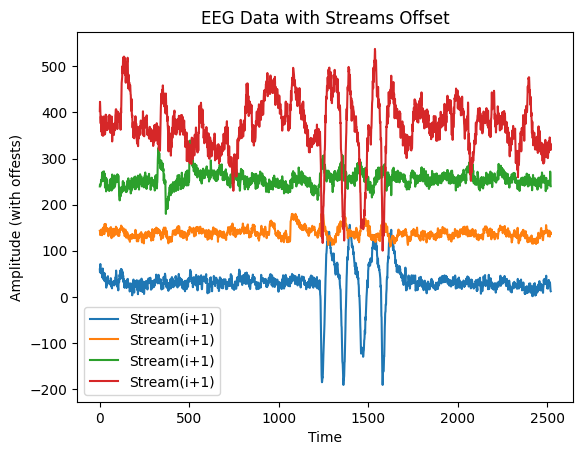

In [1]:
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes
import numpy as np
import matplotlib.pyplot as plt
import time

params = BrainFlowInputParams()
params.serial_port = 'COM3' #Change this depending on your device and OS
board_id = 38 #Change this depending on your device

#Prepares the board for reading data
try:
    board_id = 38
    board = BoardShim(board_id, params)
    board.prepare_session()
    print("Successfully prepared physical board.")
except Exception as e:
    print(e)
    #If the device cannot be found or is being used elsewhere, creates a synthetic board instead
    print("Device could not be found or is being used by another program, creating synthetic board.")
    board_id = BoardIds.SYNTHETIC_BOARD
    board = BoardShim(board_id, params)
    board.prepare_session()
#Releases the board session
board.release_session()

print("Starting Stream")
board.prepare_session()
board.start_stream()
print("Stream Started")
time.sleep(10) #wait 10 seconds
data = board.get_board_data() #gets all data from board and removes it from internal buffer
print("Ending stream")
board.stop_stream()
board.release_session()
#We want to isolate just the eeg data
eeg_channels = board.get_eeg_channels(board_id)
print(eeg_channels)
eeg_data = data[eeg_channels]
print(eeg_data.shape)

DataFilter.write_file(eeg_data, 'eeg_data_test.csv', 'w') #Writes into a csv file in the current directory

restored_data = DataFilter.read_file('eeg_data_test.csv') #Reads file back
print(restored_data.shape)

#This shows how much the saved data differs from the original data, they are very similar but not equal.
print(eeg_data - restored_data)

offsets = [0, 100, 200, 300]
for i in range(eeg_data.shape[0]):
    plt.plot(np.arange(eeg_data.shape[1]), eeg_data[i] + offsets[i], label=f"Stream(i+1)")

plt.xlabel('Time')
plt.ylabel('Amplitude (with offests)')
plt.legend()
plt.title('EEG Data with Streams Offset')
plt.show()